In [1]:
import matplotlib as mpl
mpl.rc('text', usetex=False)
mpl.rc('font', family='serif')
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('axes', labelsize=20)
mpl.rc('axes', titlesize=20)
mpl.rc('figure', figsize=(6, 4))
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.io as sio
from scipy.sparse import linalg

import firedrake as fd
import hydrogym as gym

fd.utils.ScalarType

dtype('float64')

In [2]:
flow = gym.flow.Cylinder(Re=100, h5_file='../output/checkpoint.h5')

/home/firedrake/firedrake/lib/python3.8/site-packages/matplotlib_inline/config.py:75: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


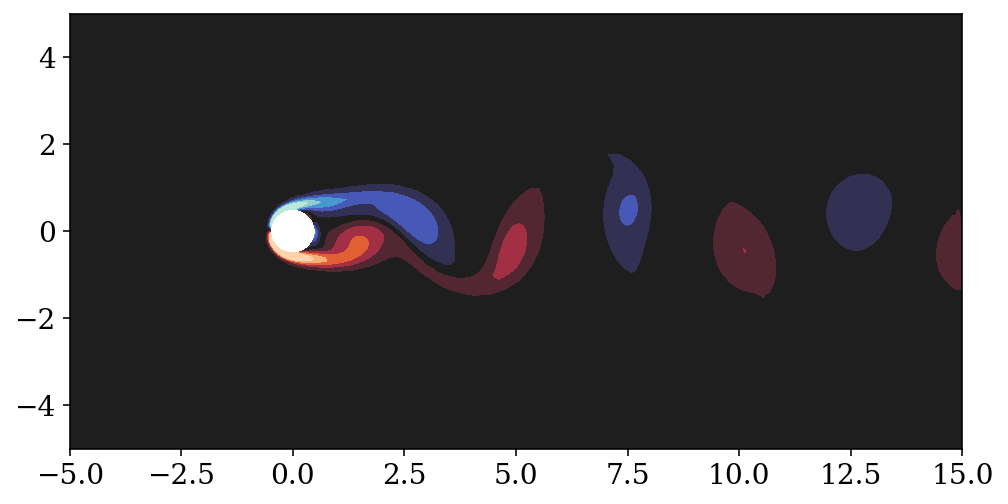

In [3]:
u, p = flow.q.split()
vort = fd.project(fd.curl(u), flow.pressure_space)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
levels = np.linspace(-5, 5, 10)
fd.tricontourf(vort, axes=ax, levels=levels, extend='both', 
               cmap=sns.color_palette("icefire", as_cmap=True))
plt.show()

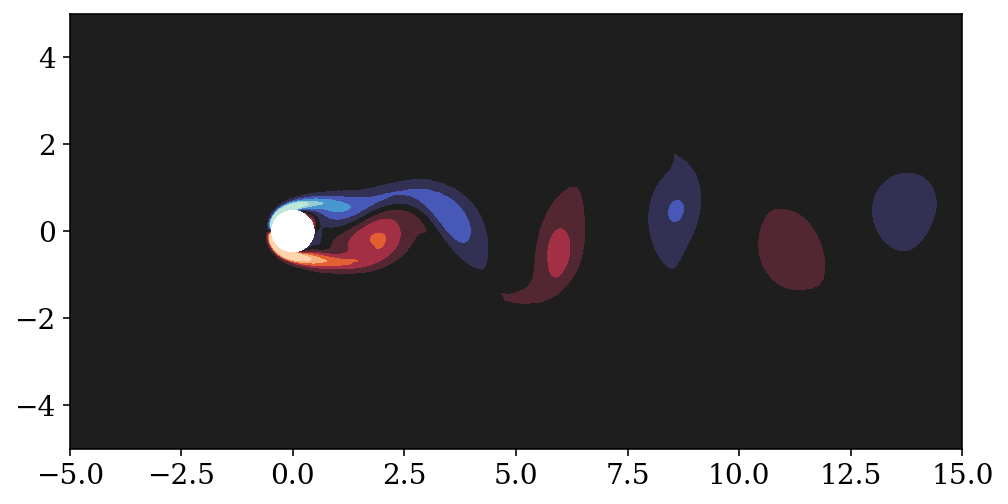

In [4]:
flow.load_checkpoint('../output/snapshots.h5', idx=20)
    
u, p = flow.q.split()
vort = fd.project(fd.curl(u), flow.pressure_space)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
levels = np.linspace(-5, 5, 10)
fd.tricontourf(vort, axes=ax, levels=levels, extend='both', 
               cmap=sns.color_palette("icefire", as_cmap=True))
plt.show()

In [5]:
from scipy import sparse
M = sparse.load_npz(f'../modred/output/mass_matrix.npz')

r = 8
coeffs, mode_handles = gym.linalg.pod(flow,
    snapshot_prefix = f'../modred/output/snapshots/',
    decomp_indices = range(100),
    mass_matrix = M,
    remove_mean = True,
    r = r,
)

Computing the inner product array will take at least 0.3 minutes


Completed 100% of inner products


Linear combinations will take at least 0.0 minutes


Completed 100% of linear combinations


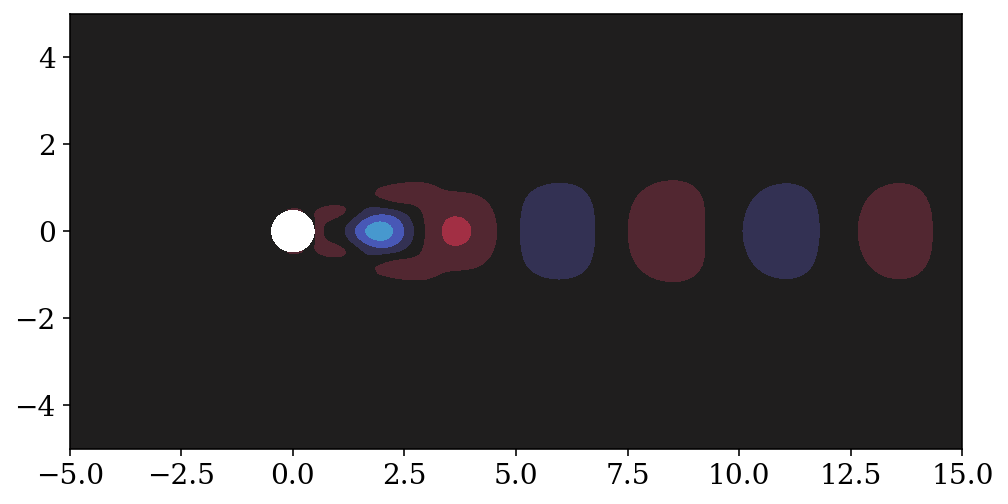

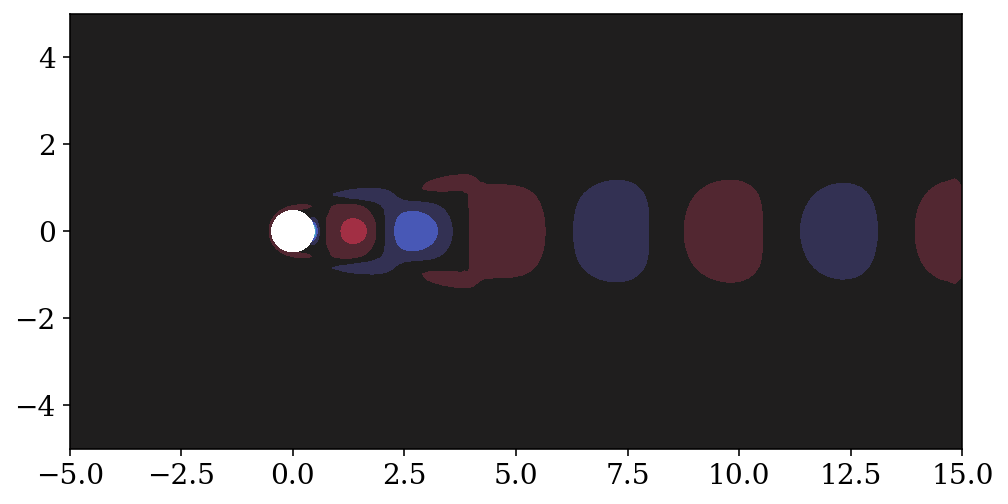

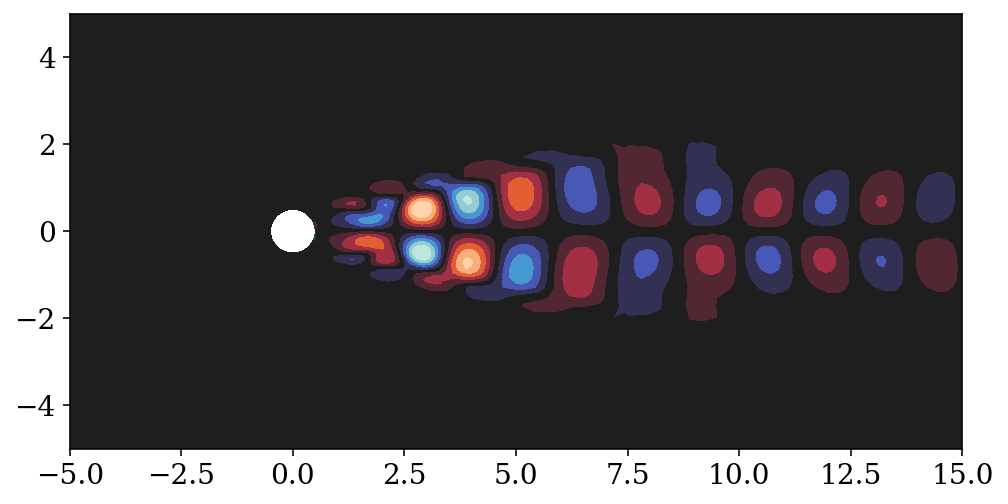

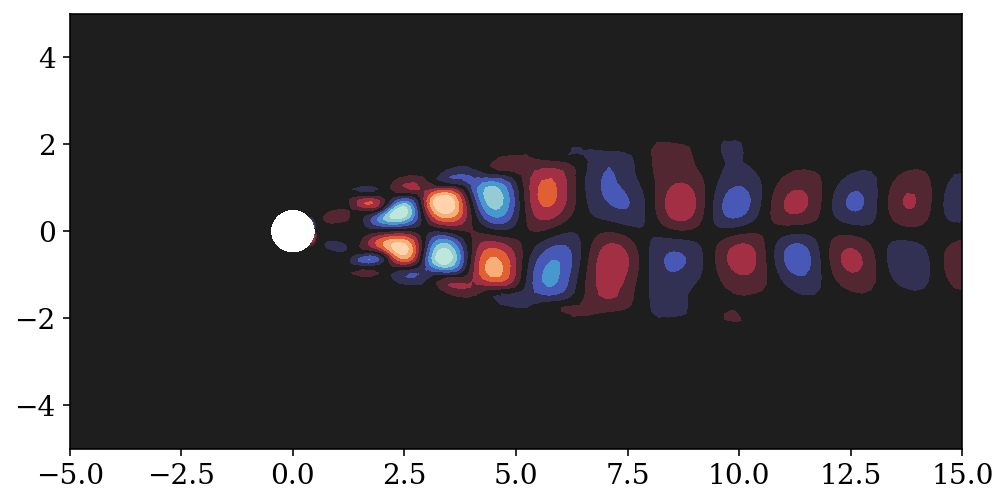

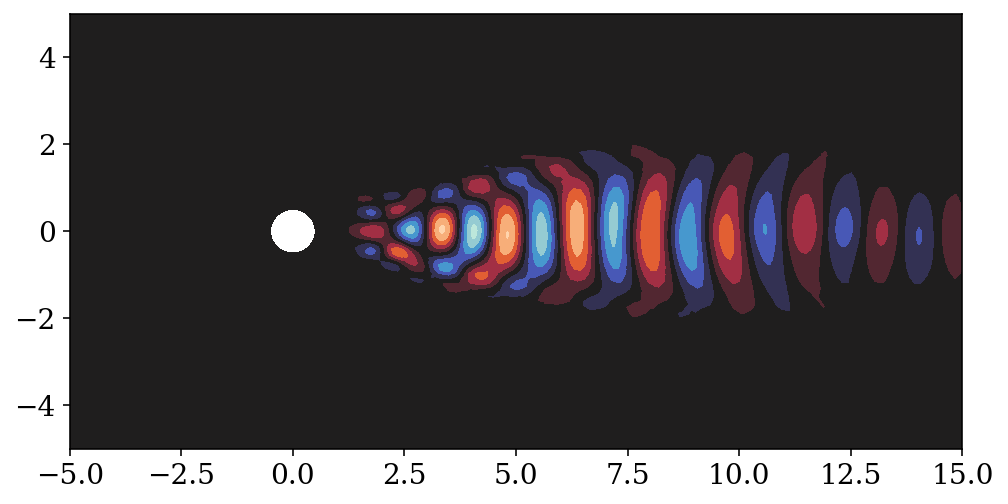

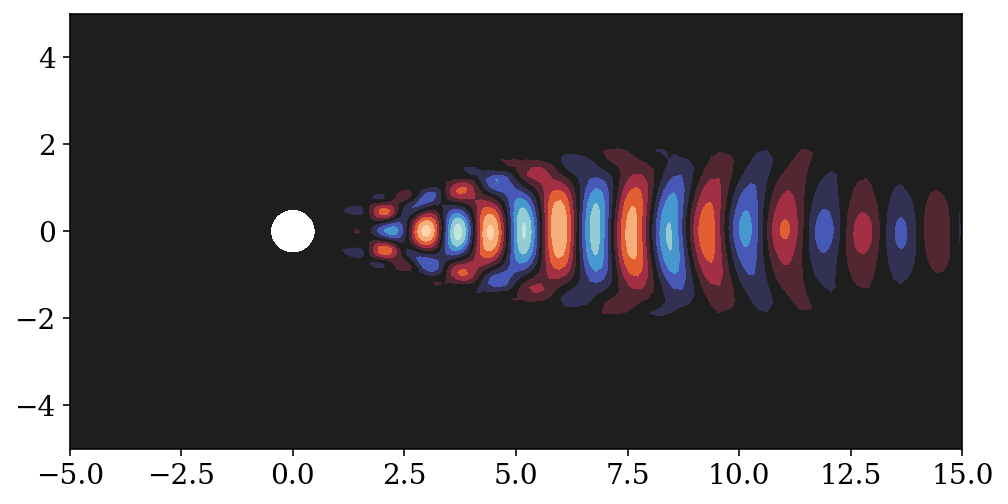

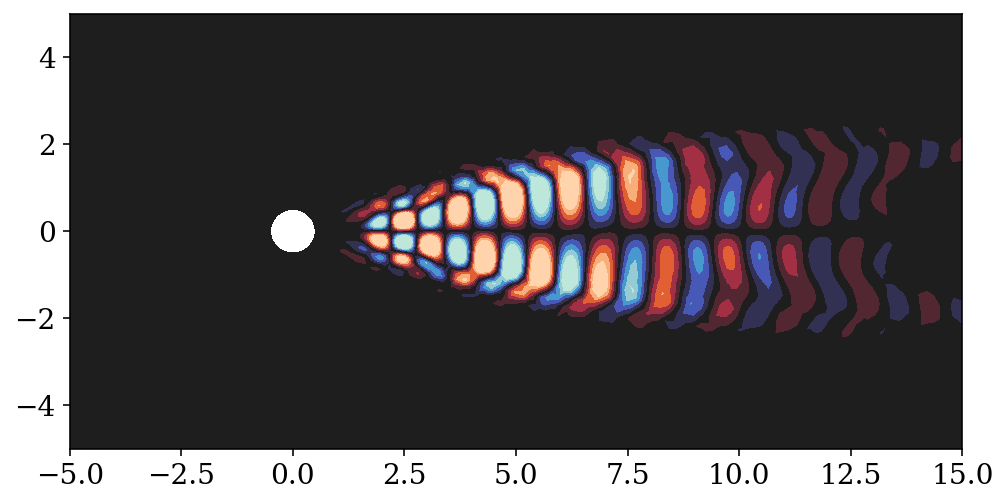

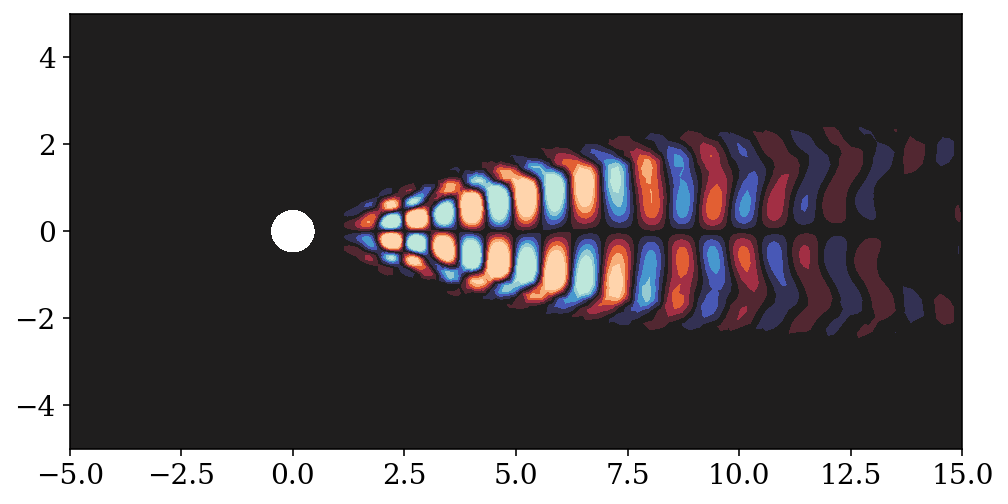

In [6]:
for i in range(r):
    q = mode_handles[i].as_function(flow)
    u1, p1 = q.split()
    vort = fd.project(fd.curl(u1), flow.pressure_space)

    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    levels = np.linspace(-1, 1, 10)
    fd.tricontourf(vort, axes=ax, levels=levels, extend='both', 
                   cmap=sns.color_palette("icefire", as_cmap=True))
    plt.show()